# Evaluate 2

Training convergence figures.

In [96]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sys_simulator.general import load_with_pickle, sns_confidence_interval_plot
from copy import deepcopy
import os

In [97]:
EXP_NAME = 'evaluate2'

# ddpg
ALGO_NAME = 'ddpg'
filepath = "/home/lucas/dev/sys-simulator-2/data/ddpg/evaluate2/20210522-201939/log.pickle"
# dql
# ALGO_NAME = 'dql'
# filepath = "/home/lucas/dev/sys-simulator-2/data/dql/evaluate2/20210524-232333/log.pickle"
# a2c
# ALGO_NAME = 'a2c'
# filepath = "/home/lucas/dev/sys-simulator-2/data/a2c/evaluate2/20210524-224905/log.pickle"
# output path
OUTPUT_PATH = f'/home/lucas/dev/sys-simulator-2/figs/{EXP_NAME}/{ALGO_NAME}'

file = open(filepath, 'rb')
data = pickle.load(file)
file.close()

In [98]:
data.keys()

dict_keys(['mue_availability', 'mue_sinrs', 'd2d_sinrs', 'd2d_tx_powers', 'trajectories', 'mue_tx_powers'])

In [99]:
mue_sinrs = np.array(data['mue_sinrs'])
mue_sinrs.shape

(700,)

In [100]:
d2d_sinrs = np.array(data['d2d_sinrs'])
d2d_sinrs.shape

(700, 2)

In [101]:
mue_tx_powers = np.array(data['mue_tx_powers'])
mue_tx_powers.shape

(700,)

In [102]:
d2d_tx_powers = np.array(data['d2d_tx_powers'])
d2d_tx_powers.shape

(700, 2)

In [103]:
d2d_tx_powers[0]

array([-128.91443,  -87.54596], dtype=float32)

In [104]:
data['trajectories'].keys()

dict_keys(['DUE.TX:0', 'DUE.RX:0', 'DUE.TX:1', 'DUE.RX:1', 'MUE:0'])

In [105]:
data['trajectories']['DUE.TX:1'][-10:]

[(-474.33499999998344, -819.8402690006187, 1.5),
 (-475.0199999999834, -821.0267238038034, 1.5),
 (-475.70499999998333, -822.2131786069881, 1.5),
 (-476.3899999999833, -823.3996334101728, 1.5),
 (-477.0749999999832, -824.5860882133575, 1.5),
 (-477.75999999998317, -825.7725430165422, 1.5),
 (-478.4449999999831, -826.9589978197268, 1.5),
 (-479.12999999998306, -828.1454526229115, 1.5),
 (-479.814999999983, -829.3319074260962, 1.5),
 (-480.49999999998295, -830.5183622292809, 1.5)]

In [106]:
mue_availability = np.array(data['mue_availability'])
mue_availability.shape

(700,)

## Fonts config

In [107]:
x_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
y_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
ticks_font = {
    'fontfamily': 'serif',
    'fontsize': 13
}
legends_font = {
    'size': 13,
    'family': 'serif'
}

## MUE SINR

In [108]:
x = list(range(mue_sinrs.shape[0]))

/home/lucas/dev/sys-simulator-2/figs/evaluate2/ddpg/mue-sinr.svg


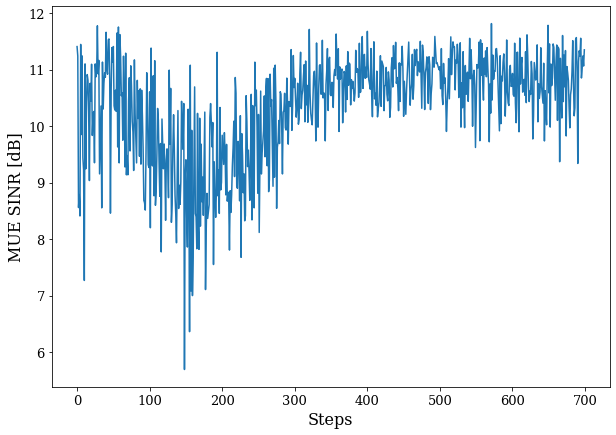

In [109]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=mue_sinrs.reshape(-1))
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('MUE SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
fig_name = 'mue-sinr'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

# MUE Tx Power

/home/lucas/dev/sys-simulator-2/figs/evaluate2/ddpg/mue-tx-power.svg


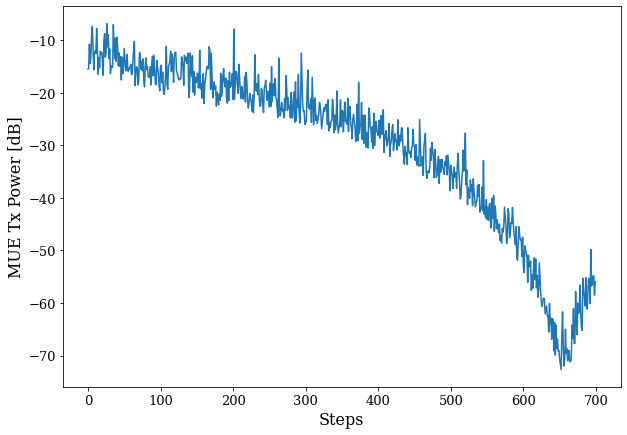

In [110]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=mue_tx_powers.reshape(-1))
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('MUE Tx Power [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
fig_name = 'mue-tx-power'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## D2D SINR

/home/lucas/dev/sys-simulator-2/figs/evaluate2/ddpg/d2d-sinr.svg


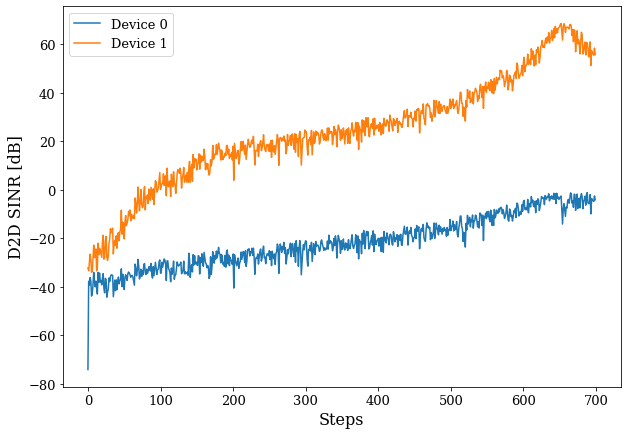

In [111]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=d2d_sinrs[:,0].reshape(-1), label='Device 0')
sns.lineplot(x=x, y=d2d_sinrs[:,1].reshape(-1), label='Device 1')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('D2D SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-sinr'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## D2D Tx Power

/home/lucas/dev/sys-simulator-2/figs/evaluate2/ddpg/d2d-tx-power.svg


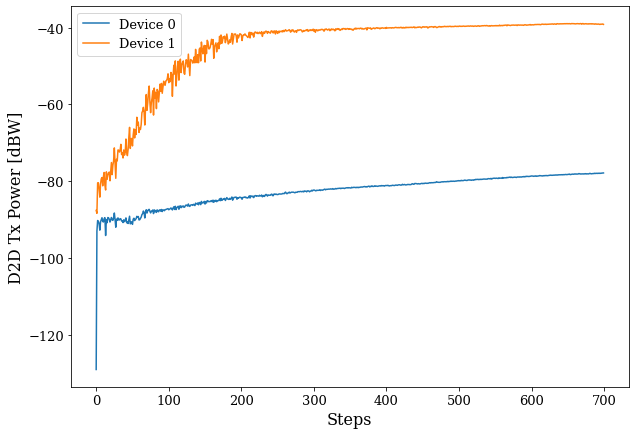

In [112]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=d2d_tx_powers[:,0].reshape(-1), label='Device 0')
sns.lineplot(x=x, y=d2d_tx_powers[:,1].reshape(-1), label='Device 1')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('D2D Tx Power [dBW]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-tx-power'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## MUE availability

/home/lucas/dev/sys-simulator-2/figs/evaluate2/ddpg/mue-availability.svg


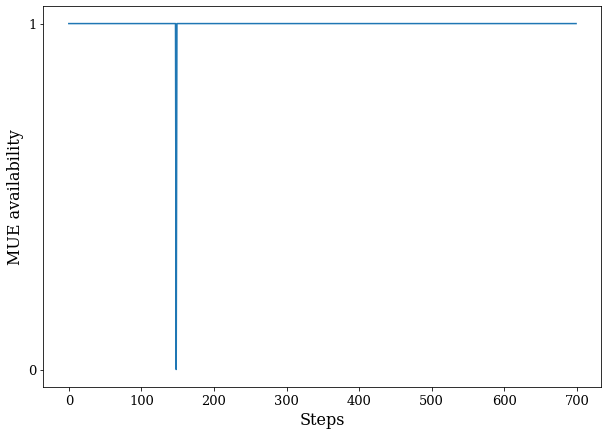

In [113]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=mue_availability.reshape(-1))
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('MUE availability', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks([0.0, 1.0], **ticks_font)
fig_name = 'mue-availability'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## Avg mue availability

In [114]:
mue_availability.mean()

0.9985714285714286